In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('Amazon Beauty Recommendation System.csv')
data

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
...,...,...,...,...
1048570,A31P1LMEXJ8MML,B003H897AQ,1,1334448000
1048571,A6U8SW1MFX122,B003H897AQ,4,1361404800
1048572,A2ND0PP8HY7KBE,B003H897AQ,1,1372464000
1048573,AC9W044EAHP8P,B003H897AQ,1,1392768000


In [3]:
print(data.isnull().sum())

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [4]:
print(data.head())

           UserId  ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  205616461       5  1369699200
1  A3JM6GV9MNOF9X  558925278       3  1355443200
2  A1Z513UWSAAO0F  558925278       5  1404691200
3  A1WMRR494NWEWV  733001998       4  1382572800
4  A3IAAVS479H7M7  737104473       1  1274227200


In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserId     1048575 non-null  object
 1   ProductId  1048575 non-null  object
 2   Rating     1048575 non-null  int64 
 3   Timestamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB
None
             Rating     Timestamp
count  1.048575e+06  1.048575e+06
mean   4.176864e+00  1.345636e+09
std    1.306543e+00  5.567113e+07
min    1.000000e+00  9.087552e+08
25%    4.000000e+00  1.322438e+09
50%    5.000000e+00  1.362960e+09
75%    5.000000e+00  1.385856e+09
max    5.000000e+00  1.406074e+09


In [6]:
print(data.columns)

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')


In [7]:
print(data.duplicated().sum())

0


In [8]:
# Clean the data
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [9]:
# Convert timestamps to datetime
data['Datetime'] = pd.to_datetime(data['Timestamp'], unit='s')

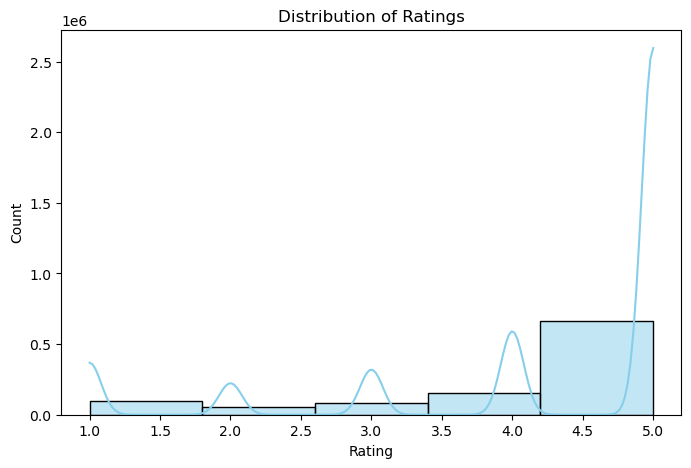

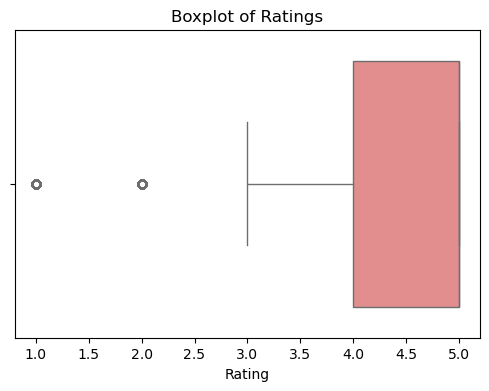

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Amazon Beauty Recommendation system.csv"
df = pd.read_csv(file_path)

# Convert 'Time' to datetime if it exists in the dataset
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Plot Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=5, kde=True, color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

# Plot Ratings Over Time if Time column exists
if 'Time' in df.columns:
    plt.figure(figsize=(12, 6))
    df.set_index('Time')['Rating'].resample('M').mean().plot()
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.title("Ratings Over Time")
    plt.show()

# Boxplot for Ratings
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rating'], color='lightcoral')
plt.xlabel("Rating")
plt.title("Boxplot of Ratings")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("Amazon Beauty Recommendation system.csv")

# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# Plot pie charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()


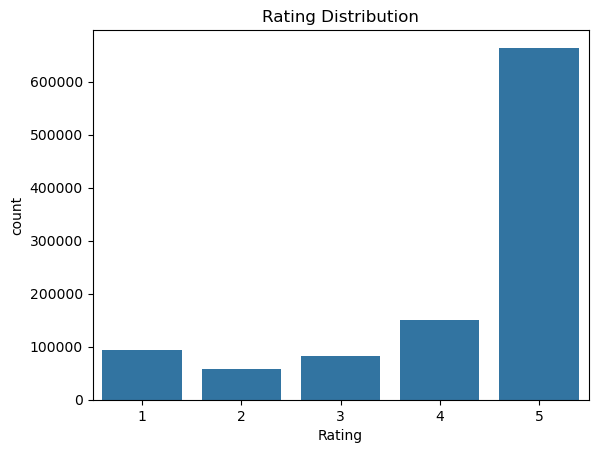

In [11]:
# Plot rating distribution
import seaborn as sns

sns.countplot(x='Rating', data=data)
plt.title('Rating Distribution')
plt.show()

In [12]:
# Find top-rated products
top_products = data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head(20)
print(top_products)

ProductId
1304139212    5.0
B000RDSCQE    5.0
B001V9DHH2    5.0
B001V9DFR4    5.0
B000RBUJ76    5.0
B001V9D3LC    5.0
B000RC544S    5.0
B001V8SGQK    5.0
B001V8OL64    5.0
B001V8N57U    5.0
B001V7YRJG    5.0
B000RCQK82    5.0
B001V7YJ3U    5.0
B000RCRELO    5.0
B000RCRNAQ    5.0
B001V7WY9G    5.0
B001V7WJGE    5.0
B000RDLKYA    5.0
B001V7UM1I    5.0
B001V9DIPS    5.0
Name: Rating, dtype: float64


In [13]:
# Analyze high-demand products
popular_products = data['ProductId'].value_counts().head(20)
print(popular_products)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0000YUXI0    2143
B000ZMBSPE    2041
B003BQ6QXK    1918
B00121UVU0    1838
B000FS05VG    1589
B000142FVW    1558
B001JKTTVQ    1468
B000TKH6G2    1379
B00150LT40    1349
B00188IFHS    1341
B002WTC38O    1159
B001AO0WCG    1136
B000UVZU1S    1105
B002LB75AO    1079
B000VPPUEA    1074
B00021DVCQ    1051
B0002JKPA4    1046
B000L596FE     992
Name: count, dtype: int64


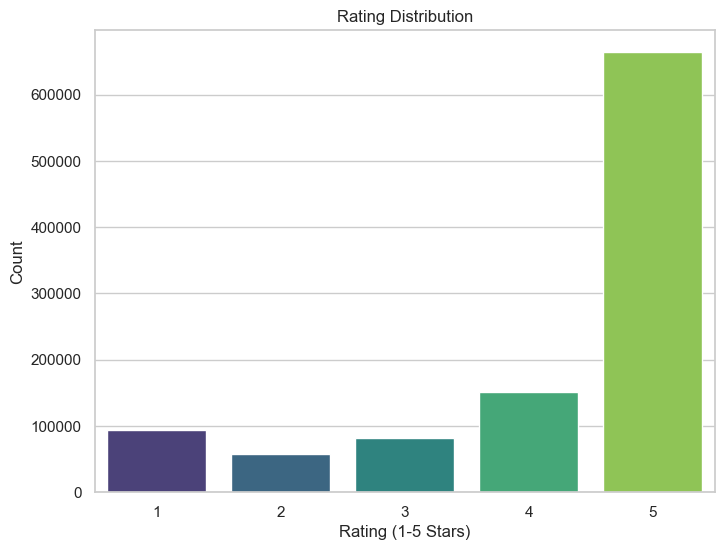

In [14]:
# Convert timestamps if applicable
if 'Timestamp' in data.columns:
    data['date'] = pd.to_datetime(data['Timestamp'], unit='s')

# Set plot style
sns.set(style="whitegrid")

# Plot rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating (1-5 Stars)')
plt.ylabel('Count')
plt.show()

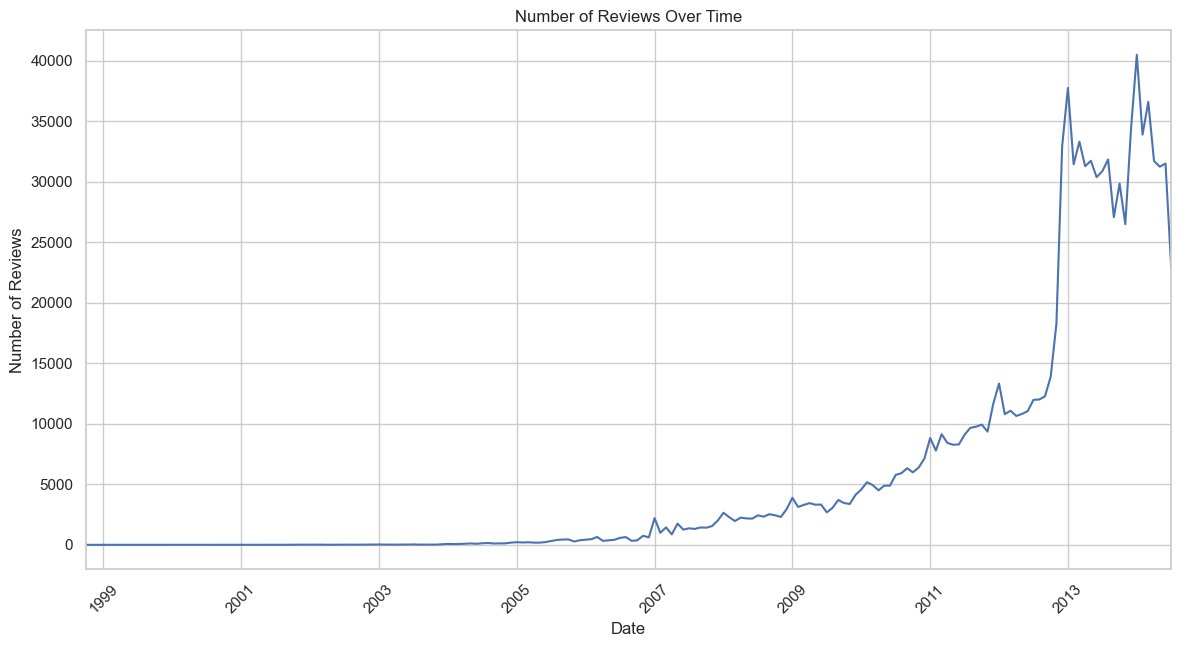

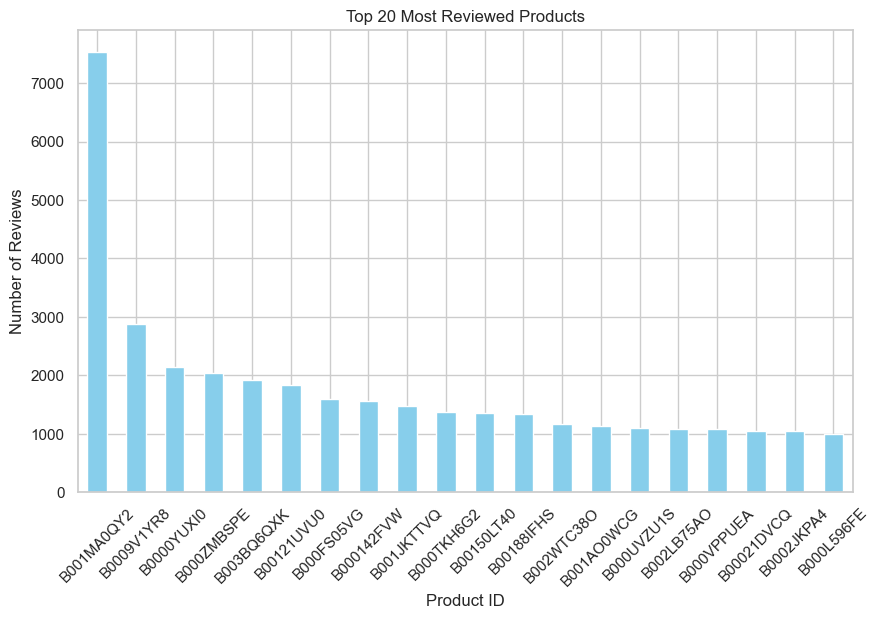

In [15]:
# Plot review counts over time
if 'date' in data.columns:
    data['year_month'] = data['date'].dt.to_period('M')
    review_counts = data['year_month'].value_counts().sort_index()
    plt.figure(figsize=(14, 7))
    review_counts.plot()
    plt.title('Number of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.show()
# Top products by review count
plt.figure(figsize=(10, 6))
top_products = data['ProductId'].value_counts().head(20)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

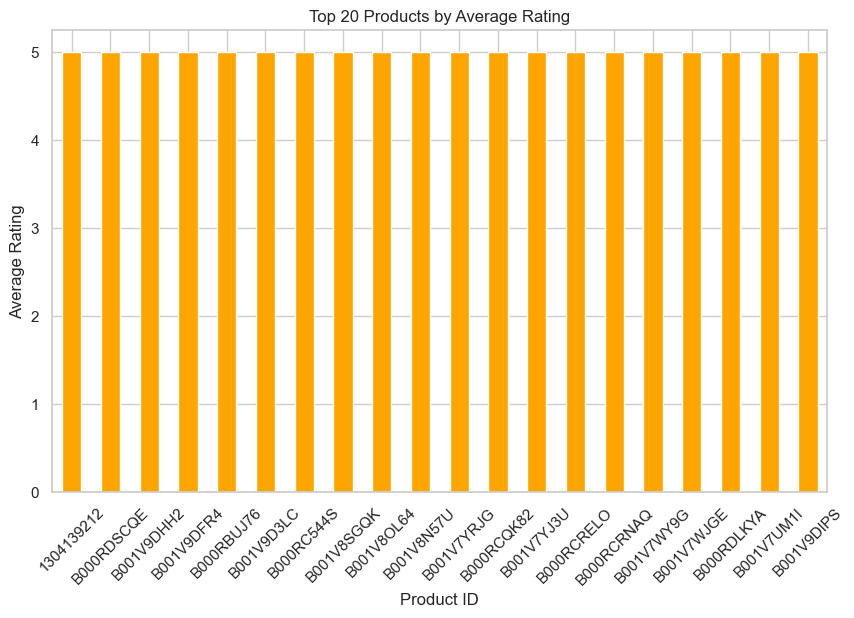

In [16]:
# Average ratings of top products
avg_ratings = data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='orange')
plt.title('Top 20 Products by Average Rating')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Extract unique users
unique_users = data['UserId'].unique()

# Convert to DataFrame and save
unique_users_data = pd.DataFrame(unique_users, columns=['UserId'])
unique_users_data.to_csv("unique_users.csv", index=False)

print("Unique users list saved as unique_users.csv")


Unique users list saved as unique_users.csv


In [18]:
# Extract unique products
unique_products = data['ProductId'].unique()

# Convert to DataFrame and save
unique_products_data = pd.DataFrame(unique_products, columns=['ProductId'])
unique_products_data.to_csv("unique_products.csv", index=False)

print("Unique products list saved as unique_products.csv")

Unique products list saved as unique_products.csv


In [25]:
print("Dataset shape before pivoting:", data_clean.shape)
print("Unique Users:", data_clean['UserId'].nunique())
print("Unique Products:", data_clean['ProductId'].nunique())
print("Ratings summary:\n", data_clean['Rating'].describe())


Dataset shape before pivoting: (60798, 7)
Unique Users: 16149
Unique Products: 2672
Ratings summary:
 count    60798.000000
mean         4.191536
std          1.199417
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [26]:
print("Rating data types:", data_clean['Rating'].dtype)
print("First few Ratings:\n", data_clean['Rating'].head())


Rating data types: int64
First few Ratings:
 15679    5
25347    5
5172     5
11581    5
40074    5
Name: Rating, dtype: int64


In [27]:
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')


In [28]:
print("Non-zero Ratings count:", (data_clean['Rating'] > 0).sum())


Non-zero Ratings count: 60798


In [23]:
import pandas as pd

# Drop missing values in required columns
data_clean = data.dropna(subset=['UserId', 'ProductId', 'Rating'])

# Ensure correct data types
data_clean['UserId'] = data_clean['UserId'].astype(str)
data_clean['ProductId'] = data_clean['ProductId'].astype(str)
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Debugging: Check if data is empty
if data_clean.empty:
    print("Error: Dataset is empty after cleaning!")
else:
    print(f"Data contains {data_clean.shape[0]} rows.")

# Filter only active users (who rated at least 5 products)
active_users = data_clean['UserId'].value_counts()
filtered_users = active_users[active_users >= 5].index
data_clean = data_clean[data_clean['UserId'].isin(filtered_users)]

# Filter only frequently rated products (at least 10 ratings)
popular_products = data_clean['ProductId'].value_counts()
filtered_products = popular_products[popular_products >= 10].index
data_clean = data_clean[data_clean['ProductId'].isin(filtered_products)]

# Debugging: Check dataset size before pivoting
print("Dataset shape before pivoting:", data_clean.shape)

# Create pivot table
pivot_table = data_clean.pivot_table(index='UserId', columns='ProductId', values='Rating', aggfunc='mean', fill_value=0)

# Save to CSV
pivot_table.to_csv("pivot_table.csv")

print("Pivot table saved successfully.")


Data contains 1048575 rows.
Dataset shape before pivoting: (60798, 7)
Pivot table saved successfully.


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Step 1: Drop missing values
data_clean = data.dropna(subset=['UserId', 'ProductId', 'Rating'])

# Step 2: Ensure correct data types
data_clean['UserId'] = data_clean['UserId'].astype(str)
data_clean['ProductId'] = data_clean['ProductId'].astype(str)
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Step 3: Remove duplicate ratings (keep latest if timestamp exists)
if 'Timestamp' in data_clean.columns:
    data_clean = data_clean.sort_values(by='Timestamp').drop_duplicates(subset=['UserId', 'ProductId'], keep='last')

# Step 4: Filter active users (users who rated at least 5 products)
active_users = data_clean['UserId'].value_counts()
filtered_users = active_users[active_users >= 5].index
data_clean = data_clean[data_clean['UserId'].isin(filtered_users)]

# Step 5: Filter frequently rated products (products with at least 10 ratings)
popular_products = data_clean['ProductId'].value_counts()
filtered_products = popular_products[popular_products >= 10].index
data_clean = data_clean[data_clean['ProductId'].isin(filtered_products)]

# Step 6: Create a sparse user-item matrix (to avoid memory issues)
pivot_table = data_clean.pivot_table(index='UserId', columns='ProductId', values='Rating', aggfunc='mean', fill_value=0)
sparse_matrix = csr_matrix(pivot_table)

# Step 7: Compute user-user cosine similarity
user_similarity = cosine_similarity(sparse_matrix)

# Step 8: Convert similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=pivot_table.index, columns=pivot_table.index)

# Step 9: Save User-User Similarity Matrix to CSV
user_similarity_df.to_csv("user_similarity_matrix.csv")

print("User-User Similarity Matrix saved as user_similarity_matrix.csv")


User-User Similarity Matrix saved as user_similarity_matrix.csv


In [40]:
import pandas as pd

file_path = "preprocessed_user_similarity_matrix.csv"
try:
    df = pd.read_csv(file_path)
    print(df.head()) 
except Exception as e:
    print("Error:", e)


                  UserId  A00473363TJ8YSZ3YAGG9  A00700212KB3K0MVESPIY  \
0  A00473363TJ8YSZ3YAGG9                    0.0                    0.0   
1  A00700212KB3K0MVESPIY                    0.0                    0.0   
2  A01247753D6GFZD87MUV8                    0.0                    0.0   
3  A02155413BVL8D0G7X6DN                    0.0                    0.0   
4  A029527620Q3SK5XW16RR                    0.0                    0.0   

   A01247753D6GFZD87MUV8  A02155413BVL8D0G7X6DN  A029527620Q3SK5XW16RR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   A03236882LUP4ARMDDMXU  A03364251DGXSGA9PSR99  A0388397363MZHRU6ALSX  \
0                    0.0            

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pandas as pd

# Step 1: Drop missing values
data_clean = data.dropna(subset=['UserId', 'ProductId', 'Rating'])

# Step 2: Ensure correct data types
data_clean['UserId'] = data_clean['UserId'].astype(str)
data_clean['ProductId'] = data_clean['ProductId'].astype(str)
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Step 3: Remove duplicate ratings (keep latest if timestamp exists)
if 'Timestamp' in data_clean.columns:
    data_clean = data_clean.sort_values(by='Timestamp').drop_duplicates(subset=['UserId', 'ProductId'], keep='last')

# Step 4: Filter active users (users who rated at least 5 products)
active_users = data_clean['UserId'].value_counts()
filtered_users = active_users[active_users >= 5].index
data_clean = data_clean[data_clean['UserId'].isin(filtered_users)]

# Step 5: Filter frequently rated products (products with at least 10 ratings)
popular_products = data_clean['ProductId'].value_counts()
filtered_products = popular_products[popular_products >= 10].index
data_clean = data_clean[data_clean['ProductId'].isin(filtered_products)]

# Step 6: Create a sparse item-item matrix (transposed user-item matrix)
pivot_table = data_clean.pivot_table(index='UserId', columns='ProductId', values='Rating', aggfunc='mean', fill_value=0)
sparse_matrix = csr_matrix(pivot_table.T)  # Transpose for item-item similarity

# Step 7: Compute item-item cosine similarity
item_similarity = cosine_similarity(sparse_matrix)

# Step 8: Convert similarity matrix to a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_table.columns, columns=pivot_table.columns)

# Step 9: Save Item-Item Similarity Matrix to CSV
item_similarity_df.to_csv("item_similarity_matrix.csv")

print("Item-Item Similarity Matrix saved as item_similarity_matrix.csv")

Item-Item Similarity Matrix saved as item_similarity_matrix.csv


In [42]:
import pandas as pd

file_path = "preprocessed_item_similarity_matrix.csv"
try:
    df = pd.read_csv(file_path)
    print(df.head()) 
except Exception as e:
    print("Error:", e)


    ProductId  1304351475  535795531X  5357955948  7806397051  8096399322  \
0  1304351475         0.0         0.0         0.0         0.0         0.0   
1  535795531X         0.0         0.0         0.0         0.0         0.0   
2  5357955948         0.0         0.0         0.0         0.0         0.0   
3  7806397051         0.0         0.0         0.0         0.0         0.0   
4  8096399322         0.0         0.0         0.0         0.0         0.0   

   974619187X  9746427962  9759091062  9788071198  ...  B003H6J36G  \
0         0.0         0.0         0.0         0.0  ...         0.0   
1         0.0         0.0         0.0         0.0  ...         0.0   
2         0.0         0.0         0.0         0.0  ...         0.0   
3         0.0         0.0         0.0         0.0  ...         0.0   
4         0.0         0.0         0.0         0.0  ...         0.0   

   B003H77EGQ  B003H7MY98  B003H7Z1Y8  B003H8180I  B003H82NBG  B003H83U36  \
0         0.0         0.0         0.0  

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load User-User and Item-Item similarity matrices
user_similarity_df = pd.read_csv("user_similarity_matrix.csv", index_col=0)
item_similarity_df = pd.read_csv("item_similarity_matrix.csv", index_col=0)

# Function to preprocess a similarity matrix
def preprocess_similarity_matrix(similarity_df, threshold=0.2):
    # Remove self-similarity (diagonal values)
    np.fill_diagonal(similarity_df.values, 0)

    # Normalize similarity scores (scale between 0 and 1)
    scaler = MinMaxScaler()
    similarity_df.iloc[:, :] = scaler.fit_transform(similarity_df)

    # Apply a threshold (remove weak similarities)
    similarity_df[similarity_df < threshold] = 0  # Set weak similarities to 0

    # Convert to sparse format for efficiency
    similarity_sparse = similarity_df.astype(np.float32)
    
    return similarity_sparse

# Preprocess both matrices
preprocessed_user_similarity = preprocess_similarity_matrix(user_similarity_df)
preprocessed_item_similarity = preprocess_similarity_matrix(item_similarity_df)

# Save preprocessed matrices
preprocessed_user_similarity.to_csv("preprocessed_user_similarity_matrix.csv")
preprocessed_item_similarity.to_csv("preprocessed_item_similarity_matrix.csv")

print("Preprocessed User-User and Item-Item Similarity Matrices saved successfully!")


Preprocessed User-User and Item-Item Similarity Matrices saved successfully!


In [44]:
# Function to get most similar users
def get_most_similar_users(user_id, similarity_matrix, top_n=5):
    if user_id not in similarity_matrix.index:
        return f"User {user_id} not found in similarity matrix."
    
    # Get similarity scores for the given user, sort in descending order
    similar_users = similarity_matrix[user_id].sort_values(ascending=False)[1:top_n+1]
    
    return similar_users

# Load preprocessed user similarity matrix
user_similarity_df = pd.read_csv("preprocessed_user_similarity_matrix.csv", index_col=0)

# Example: Get top 5 most similar users for a given user
user_id = "A100LIFNJYZWW7"   # Replace with actual user ID
most_similar_users = get_most_similar_users(user_id, user_similarity_df, top_n=10)

print("Most Similar Users:\n", most_similar_users)


Most Similar Users:
 UserId
A3Q8JZTT51HCHI    0.685994
ACVH35OABAST1     0.624695
A347POGDS5NCM1    0.577350
A1SRCJ3IQSRTOH    0.577350
A207275AVUSNE3    0.565685
AVIX88JDOKUBU     0.565685
A3EMK9IAD9NQI9    0.565685
A2O6QPDDPICFBU    0.565685
A58DF8Y9D4O1Y     0.562544
AZEBEP2KCAHJ6     0.518476
Name: A100LIFNJYZWW7, dtype: float64


In [45]:
# Function to get most similar items
def get_most_similar_items(item_id, similarity_matrix, top_n=5):
    if item_id not in similarity_matrix.index:
        return f"Item {item_id} not found in similarity matrix."
    
    return similarity_matrix[item_id].nlargest(top_n + 1)[1:]  # Exclude self-similarity

# Load preprocessed item similarity matrix
item_similarity_df = pd.read_csv("preprocessed_item_similarity_matrix.csv", index_col=0)

# Example: Get top 5 most similar items for a given item
item_id = item_similarity_df.index[0]   # Replace with actual item ID
most_similar_items = get_most_similar_items(item_id, item_similarity_df, top_n=5)

print("Most Similar Items:\n", most_similar_items)


Most Similar Items:
 ProductId
B000YG82HI    0.746815
B00168538E    0.746202
B001E96KZ0    0.675619
B001DJ2USM    0.645497
B002AER2FU    0.632455
Name: B00004TMFE, dtype: float64


In [46]:
# Function to generate item-based recommendations for a user
def recommend_items(user_id, user_item_matrix, item_similarity_matrix, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User {user_id} not found in the user-item matrix."

    # Get items rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0].index

    if len(rated_items) == 0:
        return f"User {user_id} has not rated any items."

    # Calculate recommendation scores
    scores = {}
    for item in rated_items:
        similar_items = item_similarity_matrix[item].nlargest(top_n + 1)[1:]  # Exclude self-similarity
        for sim_item, score in similar_items.items():
            if sim_item not in rated_items:  # Avoid already rated items
                scores[sim_item] = scores.get(sim_item, 0) + score

    # Sort recommended items by similarity score
    recommended_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return recommended_items

# Load user-item matrix and item similarity matrix
user_item_matrix = pd.read_csv("pivot_table.csv", index_col=0)
item_similarity_matrix = pd.read_csv("preprocessed_item_similarity_matrix.csv", index_col=0)

# Example: Get top 5 recommendations for a user
user_id = "A100LIFNJYZWW7"  # Replace with a valid user ID from the list
recommendations = recommend_items(user_id, user_item_matrix, item_similarity_matrix, top_n=5)

print("Recommended Items:\n", recommendations)



Recommended Items:
 [('B001AN0UTC', 0.9327552), ('B000O9O4YU', 0.79583716), ('B000Z605H2', 0.6693161), ('B00006IGL8', 0.6593407), ('B002LHIQKQ', 0.6479391)]


In [47]:
print("Available Users:", user_item_matrix.index.tolist())


Available Users: ['A00473363TJ8YSZ3YAGG9', 'A00700212KB3K0MVESPIY', 'A01247753D6GFZD87MUV8', 'A02155413BVL8D0G7X6DN', 'A029527620Q3SK5XW16RR', 'A03236882LUP4ARMDDMXU', 'A03364251DGXSGA9PSR99', 'A0388397363MZHRU6ALSX', 'A06298653TJ91G7R7MD6R', 'A0733801U845JJGV4H8V', 'A09386383518NVR7RSA4F', 'A099766128UI0NCS98N1E', 'A09990231IWF6T3K3D6QI', 'A100LIFNJYZWW7', 'A100UD67AHFODS', 'A100VQNP6I54HS', 'A100WO06OQR8BQ', 'A1010QRG4BH51B', 'A1016Z89IM29SK', 'A101NJYKW882Y0', 'A101Q13OPIP7ZR', 'A10207079F09W5HTL0Q6', 'A10220YORA6MUU', 'A102866V814SOJ', 'A102JNFLL0KW7I', 'A102MU6ZC9H1N6', 'A103979529MRJY0U56QI4', 'A103BJIOJSDJL1', 'A103QUZ016BQNJ', 'A103U3KR4L2ZXT', 'A103WXT3CHVY0H', 'A103ZVTCQUF348', 'A1043CGOMHVZQ7', 'A10471B8ZIMVS', 'A1047EDJ84IMAS', 'A104BMR0QRIDSZ', 'A1051DBTLWP5A2', 'A1052V04GOA7RV', 'A1057ZABSPSAXE', 'A105G0U2S73Z3E', 'A105R38CAPDBGU', 'A105S56ODHGJEK', 'A105TMLESHR0Y4', 'A105TOJ6LTVMBG', 'A1061GUVDRBQRS', 'A106E0KJW7C13K', 'A106R34K3VRITJ', 'A106YK8JBW1JBP', 'A1076V1FMO3G71'

In [1]:
import pandas as pd
import joblib

# Load the item similarity matrix
item_similarity_matrix = pd.read_csv("preprocessed_item_similarity_matrix.csv", index_col=0)

# Save the model
joblib.dump(item_similarity_matrix, "model.pkl")

print("Model saved as model.pkl!")


Model saved as model.pkl!


In [2]:
import joblib
import gzip

# Save the model with gzip compression
with gzip.open("model.pkl.gz", "wb") as f:
    joblib.dump(item_similarity_matrix, f)

print("Compressed model saved as model.pkl.gz!")


Compressed model saved as model.pkl.gz!


In [3]:
with gzip.open("model.pkl.gz", "rb") as f:
    item_similarity_matrix = joblib.load(f)


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Amazon Beauty Recommendation system.csv")  # Change to your actual file path

# Extract required information
shape = df.shape
num_categorical = df.select_dtypes(include=['object', 'category']).shape[1]
num_continuous = df.select_dtypes(include=['number']).shape[1]
num_missing_values = df.isnull().sum().sum()
num_duplicated_rows = df.duplicated().sum()

# Print the results
print("Shape of dataset:", shape)
print("No of Categorical Features:", num_categorical)
print("No of Continuous Features:", num_continuous)
print("No of Missing Values:", num_missing_values)
print("No of Duplicated Rows:", num_duplicated_rows)


Shape of dataset: (1048575, 4)
No of Categorical Features: 2
No of Continuous Features: 2
No of Missing Values: 0
No of Duplicated Rows: 0


In [4]:
# Display pre-processed dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserId     1048575 non-null  object
 1   ProductId  1048575 non-null  object
 2   Rating     1048575 non-null  int64 
 3   Timestamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB
None
